Deseja ver a lista de dias que houve geração de energia? Responda com S ou N
S
Dias em que houve geração de energia:
2019/01/26
2019/06/13
2019/05/03
2019/04/10
2019/05/16
2019/05/13
2019/01/29
2019/06/27
2019/06/03
2019/05/29
2019/03/19
2019/06/01
2019/02/01
2019/03/06
2019/04/30
2019/01/12
2019/01/27
2019/05/17
2019/03/17
2019/02/25
2019/03/09
2019/02/03
2019/02/27
2019/02/16
2019/06/05
2019/04/24
2019/01/14
2019/05/10
2019/04/15
2019/01/01
2019/04/06
2019/05/20
2019/02/10
2019/05/09
2019/06/26
2019/04/17
2019/05/05
2019/06/02
2019/01/02
2019/06/06
2019/04/22
2019/06/22
2019/01/06
2019/03/15
2019/02/23
2019/02/21
2019/06/24
2019/03/05
2019/03/24
2019/03/08
2019/03/13
2019/02/02
2019/03/27
2019/06/17
2019/03/26
2019/06/07
2019/01/30
2019/03/02
2019/05/02
2019/05/14
2019/01/31
2019/01/24
2019/06/15
2019/02/05
2019/03/20
2019/01/05
2019/06/12
2019/03/01
2019/06/19
2019/02/04
2019/03/28
2019/04/07
2019/02/26
2019/02/13
2019/04/18
2019/05/06
2019/01/28
2019/06/30
2019/02/19
2019/05/25
201

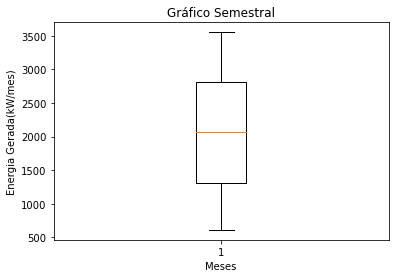

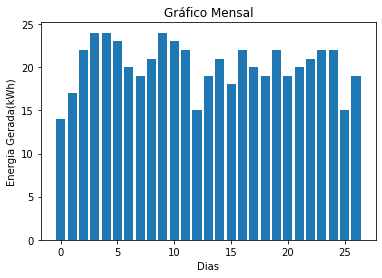

In [6]:
import json
import urllib.request as req
import matplotlib.pyplot as plt

def graficolinha(x, y):
  plt.plot(x, y)
  plt.title('Grafico Diário')
  plt.xlabel('Horas')
  plt.ylabel('Potência(kW)')
  plt.grid(True)
  plt.savefig('linha.png')
  plt.show()
  plt.close()

def graficobarra(x, y):
  plt.bar(x, y)
  plt.title('Gráfico Mensal')
  plt.xlabel('Dias')
  plt.ylabel('Energia Gerada(kWh)')
  plt.savefig('barras.png')
  plt.show()
  plt.close()

def graficobox(x, y):
  plt.boxplot(y)
  plt.title('Gráfico Semestral')
  plt.xlabel('Meses')
  plt.ylabel('Energia Gerada(kW/mes)')
  plt.savefig('boxplot.png')
  plt.show()
  plt.close()

soma_en_tot = 0
dadosmes = []
list_pot_efet = []
list_en_mes = []
num = 0

#Coleta dos dados usando o link disponibilizado
url = "http://albertocn.sytes.net/2019-1/pi/projeto/arquivos.json"
dados = req.urlopen(url).read().decode()
dados_proc = json.loads(dados)

#Processamento dos dias da lista para melhor visualizaçåo
print('Deseja ver a lista de dias que houve geração de energia? Responda com S ou N')
show_energy_list = input()
if show_energy_list == 'S':
  print('Dias em que houve geração de energia:')
  for i in dados_proc:
    i = i.replace('dia_', '')
    i = i.replace('_', '/')
    i = i.replace('.json', '')
    print(i)
    
#Comandos para o usuário inserir a informação desejada
print('Insira o Ano:')
yr = input()
print('Mostrar gráfico semestral? Responda com S ou N')
show_box_graph = input()

print('Insira o Mês:')
mth = input()
print('Mostrar gráfico mensal? Responda com S ou N')
show_bar_graph = input()

print('Insira o Dia:')
day = input()
print('Mostrar gráfico diário? Responda com S ou N')
show_line_graph = input()

#Substituição da informação do usuário no link dos dados
link = 'http://albertocn.sytes.net/2019-1/pi/projeto/dia_X_Y_Z.json'
for X in link:
  link_yr = link.replace('X', yr)
for Y in link_yr:
  link_mth = link_yr.replace('Y', mth)
for Z in link_mth:
  link_day = link_mth.replace('Z', day)

try:

  print('Carregando, aguarde...')

#Código para gerar o Gráfico Semestral (BoxPlot)
  if show_box_graph == 'S':
    for i in range(1, 7):
      i = str(i)
      linkmthtemp = link_mth.replace('Y', '0'+i)
      if i == '4' or i == '6':
        for i in range(1,10):
          i = str(i)
          linkfirst10 = linkmthtemp.replace('Z', '0'+ i)
          arquivo = req.urlopen(linkfirst10).read().decode()
          arquivo_proc = json.loads(arquivo)
          dadosfirst10 = arquivo_proc['energiaDia']
          if dadosfirst10 == -1:
            dadosfirst10 = 0
          soma_en_tot = soma_en_tot + dadosfirst10
        for i in range(11, 31):
          i = str(i)
          linklast20 = linkmthtemp.replace('Z', i)
          arquivo = req.urlopen(linklast20).read().decode()
          arquivo_proc = json.loads(arquivo)
          dadoslast20 = arquivo_proc['energiaDia']
          if dadoslast20 == -1:
            dadoslast20 = 0
          soma_en_tot = soma_en_tot + dadoslast20
      if i == '1' or i == '3' or i == '5':
        for i in range(1,10):
          i = str(i)
          linkfirst10 = linkmthtemp.replace('Z', '0'+ i)
          arquivo = req.urlopen(linkfirst10).read().decode()
          arquivo_proc = json.loads(arquivo)
          dadosfirst10 = arquivo_proc['energiaDia']
          if dadosfirst10 == -1:
            dadosfirst10 = 0
          soma_en_tot = soma_en_tot + dadosfirst10
        for i in range(11, 32):
          i = str(i)
          linklast20 = linkmthtemp.replace('Z', i)
          arquivo = req.urlopen(linklast20).read().decode()
          arquivo_proc = json.loads(arquivo)
          dadoslast20 = arquivo_proc['energiaDia']
          if dadoslast20 == -1:
            dadoslast20 = 0
          soma_en_tot = soma_en_tot + dadoslast20
      if i == '2':
        for i in range(1,10):
          i = str(i)
          linkfirst10 = linkmthtemp.replace('Z', '0'+ i)
          arquivo = req.urlopen(linkfirst10).read().decode()
          arquivo_proc = json.loads(arquivo)
          dadosfirst10 = arquivo_proc['energiaDia']
          if dadosfirst10 == -1:
            dadosfirst10 = 0
          soma_en_tot = soma_en_tot + dadosfirst10
        for i in range(11, 29):
          i = str(i)
          linklast20 = linkmthtemp.replace('Z', i)
          arquivo = req.urlopen(linklast20).read().decode()
          arquivo_proc = json.loads(arquivo)
          dadoslast20 = arquivo_proc['energiaDia']
          if dadoslast20 == -1:
            dadoslast20 = 0
          soma_en_tot = soma_en_tot + dadoslast20
      list_en_mes.append(soma_en_tot)
      num = len(list_en_mes)  
    graficobox(num, list_en_mes)

#Código para gerar o Gráfico Mensal (Barras)
  if show_bar_graph == 'S':
    if Y == '04' or Y == '06':
      for i in range(1,10):
        i = str(i)
        linkfirst10 = link_mth.replace('Z', '0'+ i)
        arquivo = req.urlopen(linkfirst10).read().decode()
        arquivo_proc = json.loads(arquivo)
        dadosfirst10 = arquivo_proc['energiaDia']
        if dadosfirst10 == -1:
          dadosfirst10 = 0
        dadosmes.append(dadosfirst10)
      for i in range(11, 31):
        i = str(i)
        linklast20 = link_mth.replace('Z', i)
        arquivo = req.urlopen(linklast20).read().decode()
        arquivo_proc = json.loads(arquivo)
        dadoslast20 = arquivo_proc['energiaDia']
        if dadoslast20 == -1:
          dadoslast20 = 0
        dadosmes.append(dadoslast20)
      num = len(dadosmes)
      graficobarra(range(num), dadosmes)
    elif Y == '01' or Y == '03' or Y == '05':
      for i in range(1,10):
        i = str(i)
        linkfirst10 = link_mth.replace('Z', '0'+ i)
        arquivo = req.urlopen(linkfirst10).read().decode()
        arquivo_proc = json.loads(arquivo)
        dadosfirst10 = arquivo_proc['energiaDia']
        if dadosfirst10 == -1:
          dadosfirst10 = 0
        dadosmes.append(dadosfirst10)
      for i in range(11, 32):
        i = str(i)
        linklast20 = link_mth.replace('Z', i)
        arquivo = req.urlopen(linklast20).read().decode()
        arquivo_proc = json.loads(arquivo)
        dadoslast20 = arquivo_proc['energiaDia']
        if dadoslast20 == -1:
          dadoslast20 = 0
        dadosmes.append(dadoslast20)
      num = len(dadosmes)
      graficobarra(range(num), dadosmes)
    else:
      for i in range(1,10):
        if i == -1:
          i = 0
        i = str(i)
        linkfirst10 = link_mth.replace('Z', '0'+ i)
        arquivo = req.urlopen(linkfirst10).read().decode()
        arquivo_proc = json.loads(arquivo)
        dadosfirst10 = arquivo_proc['energiaDia']
        if dadosfirst10 == -1:
          dadosfirst10 = 0
        dadosmes.append(dadosfirst10)
      for i in range(11, 29):
        i = str(i)
        linklast20 = link_mth.replace('Z', i)
        arquivo = req.urlopen(linklast20).read().decode()
        arquivo_proc = json.loads(arquivo)
        dadoslast20 = arquivo_proc['energiaDia']
        if dadoslast20 == -1:
          dadoslast20 = 0
        dadosmes.append(dadoslast20)
      num = len(dadosmes)
      graficobarra(range(num), dadosmes)

#Código para gerar o Gráfico Diário (Linha)
  if show_line_graph == 'S':
    arquivo = req.urlopen(link_day).read().decode()
    arquivo_proc = json.loads(arquivo)
    dadospot = arquivo_proc["potencia"]
    for i in dadospot:
      if i != -1:
        list_pot_efet.append(i)
    num = len(list_pot_efet)    
    graficolinha(range(num), list_pot_efet)

#Exceção para caso a informação do usuário não esteja no arquivo disponibilizado 
except:
  print('Ops! Algo deu errado :/')
  print('Tente colocar uma data que esteja na lista')